# Logistic Regression Project

For this project, I have used [Heart Disease Dataset](https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression) available on Kaggle to predict heart disease using logistic model.


**About the dataset:** Columns description-
* Sex: male or female(Nominal)
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
* Current Smoker: whether or not the patient is a current smoker (Nominal)
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import warnings      #to avoid warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data

data = pd.read_csv('datasets_222487_478477_framingham.csv')
data.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

I use **pandas_profiling** library to understand the data.

It is a nice alternative to using .info and .describe methods.Infact, it gives much more useful informations.

In [3]:
import pandas_profiling
data.profile_report()

**Conclusions-**
- Our data contains 4238 rows and 16 columns.
- Seems like this data is already preprocessed as there is no categorical columns. Those features have been encoded already.
Now, let's see missing values.
- Columns having mising values are: 'education'(2.5%), 'cigsPerDay'(0.7%), 'BPMeds'(1.3%), 'totChol'(1.2%) and 'glucose'(**9.2%**).
Except the feature glucose all other missing values are less than 2% of data. We can drop all other missing values but in this project I choose to use SimpleImputer to impute them with most frequent value.
As for feature glucose, notice in heatmap that glucose is highly correlated with diabetes. So, I will use feature diabetes to fill missing values in glucose.

## EDA

In [4]:
sns.set(style="whitegrid")

 “1” means “Yes”, “0” means “No”


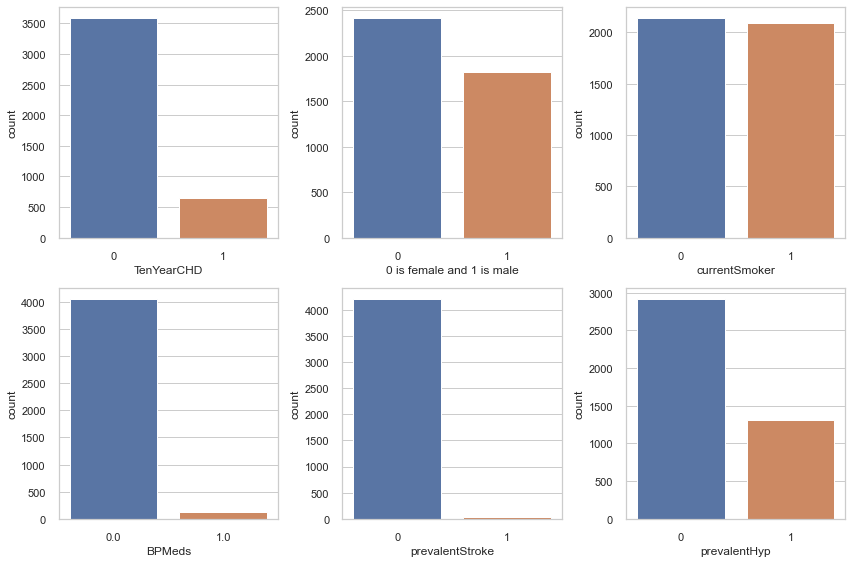

In [5]:
#Distribution of boolean variables

print(' “1” means “Yes”, “0” means “No”')
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8))
sns.countplot(data.TenYearCHD,ax=axes[0,0])
sns.countplot(data.male,ax=axes[0,1])
axes[0,1].set_xlabel("0 is female and 1 is male")
sns.countplot(data.currentSmoker,ax=axes[0,2])
sns.countplot(data.BPMeds,ax=axes[1,0])
sns.countplot(data.prevalentStroke,ax=axes[1,1])
sns.countplot(data.prevalentHyp,ax=axes[1,2])
plt.tight_layout()

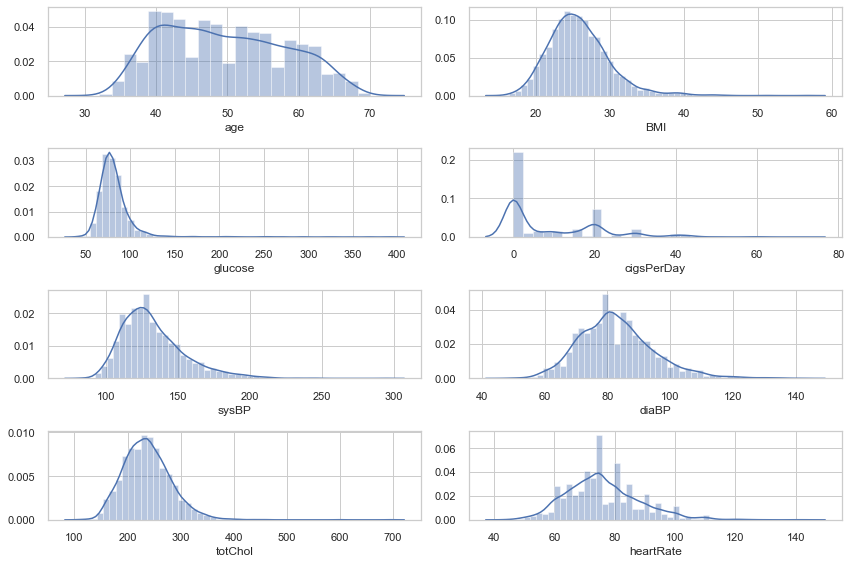

In [6]:
#Distribution of continuous variables

fig,axes = plt.subplots(nrows=4,ncols=2,figsize=(12,8))
sns.distplot(data.age,ax=axes[0,0])
sns.distplot(data.BMI,ax=axes[0,1])
sns.distplot(data.glucose,ax=axes[1,0])
sns.distplot(data.cigsPerDay,ax=axes[1,1])
sns.distplot(data.sysBP,ax=axes[2,0])
sns.distplot(data.diaBP,ax=axes[2,1])
sns.distplot(data.totChol,ax=axes[3,0])
sns.distplot(data.heartRate,ax=axes[3,1])
plt.tight_layout()

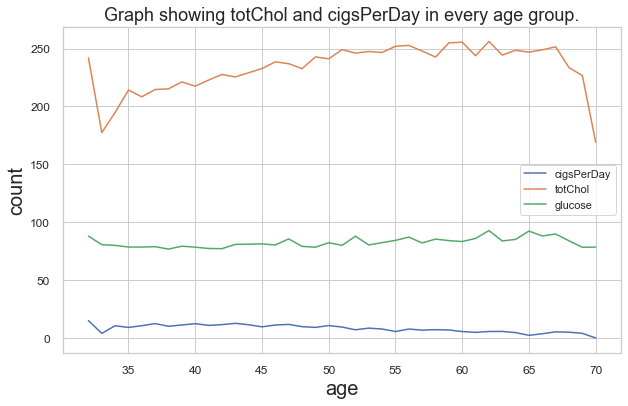

In [7]:
#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.

graph_3 = data.groupby("age").cigsPerDay.mean()
graph_4 = data.groupby("age").totChol.mean()
graph_5 = data.groupby("age").glucose.mean()

plt.figure(figsize=(10,6))
sns.lineplot(data=graph_3, label="cigsPerDay")
sns.lineplot(data=graph_4, label="totChol")
sns.lineplot(data=graph_5, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.",{'fontsize':18})
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12);

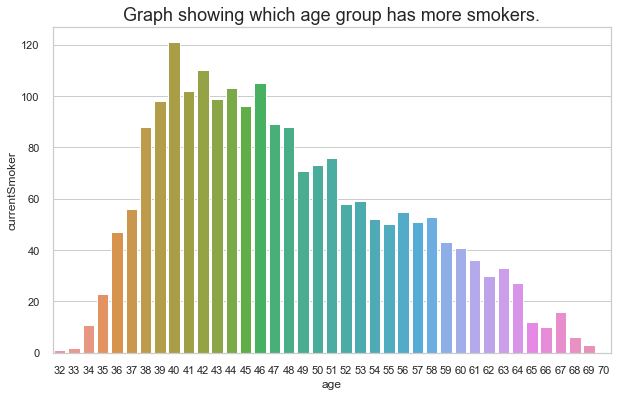

In [8]:
graph = data.groupby("age",as_index=False).currentSmoker.sum()

plt.figure(figsize=(10,6))
sns.barplot(x=graph["age"], y=graph["currentSmoker"])
plt.title("Graph showing which age group has more smokers.",{'fontsize':18});

## Handling missing values

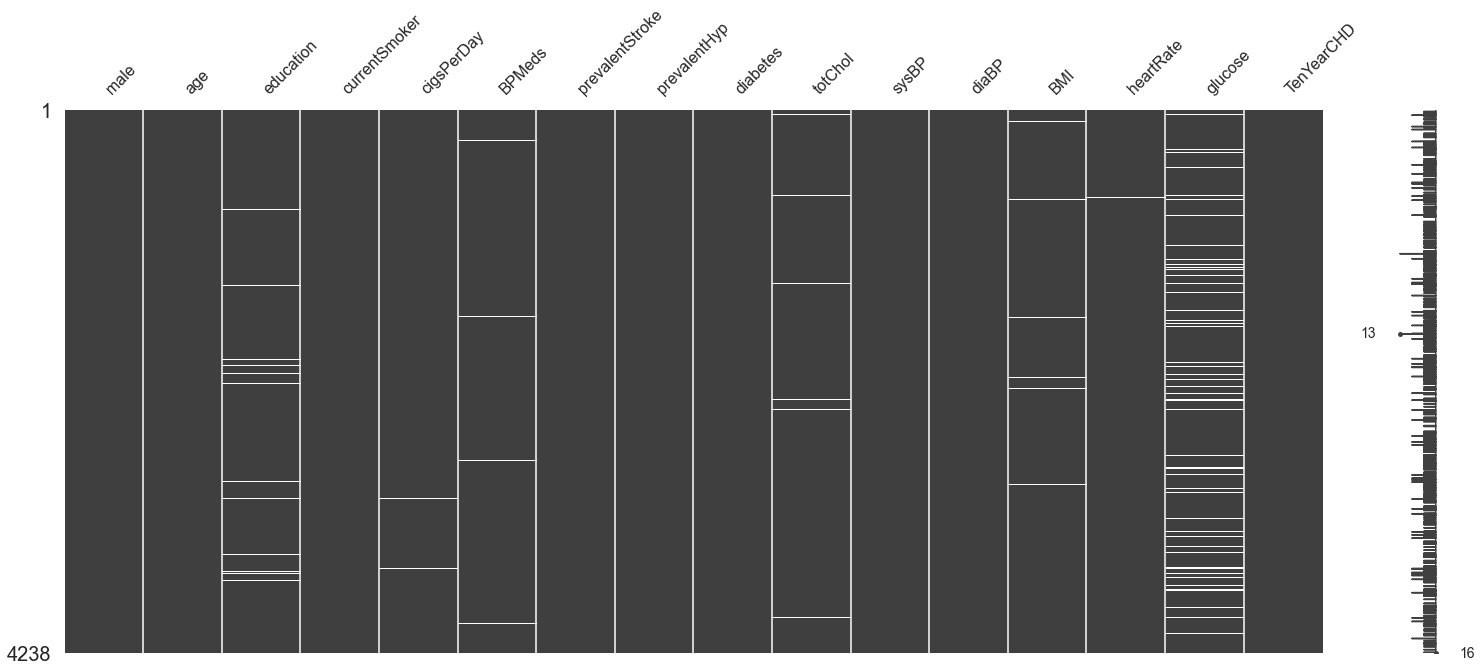

In [9]:
# Let's have a visual look at missing data

msno.matrix(data)

In [10]:
data.groupby('diabetes').mean()['glucose']

diabetes
0     79.489186
1    170.333333
Name: glucose, dtype: float64

In [11]:
def impute_glucose(cols):
    dia=cols[0]
    glu=cols[1]
    if pd.isnull(glu):
        if dia == 0:
            return 79
        else:
            return 170
    else:
        return glu

data['glucose'] = data[['diabetes','glucose']].apply(impute_glucose,axis=1)

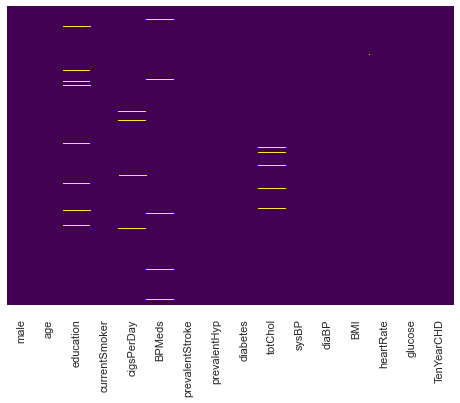

In [12]:
#Another way to visualize missing data

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

So, glucose feature has no missing data now.

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imputer = SimpleImputer(strategy='most_frequent')

In [15]:
imputer.fit(data)
imputed_data = imputer.transform(data)
imputed_data = pd.DataFrame(imputed_data,columns=data.columns)
imputed_data.head(4)

male   age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0   1.0  39.0        4.0            0.0         0.0     0.0              0.0   
1   0.0  46.0        2.0            0.0         0.0     0.0              0.0   
2   1.0  48.0        1.0            1.0        20.0     0.0              0.0   
3   0.0  61.0        3.0            1.0        30.0     0.0              0.0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0           0.0       0.0    195.0  106.0   70.0  26.97       80.0     77.0   
1           0.0       0.0    250.0  121.0   81.0  28.73       95.0     76.0   
2           0.0       0.0    245.0  127.5   80.0  25.34       75.0     70.0   
3           1.0       0.0    225.0  150.0   95.0  28.58       65.0    103.0   

   TenYearCHD  
0         0.0  
1         0.0  
2         0.0  
3         1.0

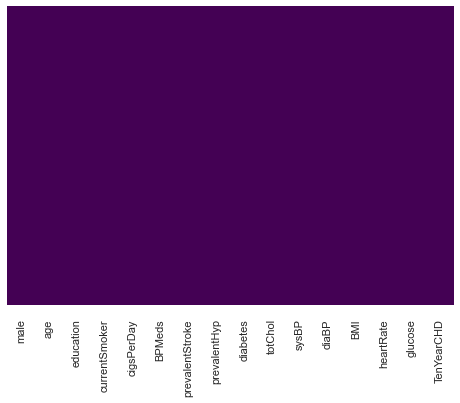

In [16]:
# just to cross-check all missing data is gone!

sns.heatmap(imputed_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Creating Model

In [17]:
#Libraries needed for model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [18]:
#First split the data

X_train, X_test, y_train, y_test = train_test_split(imputed_data.drop('TenYearCHD',axis=1), 
                                                    imputed_data['TenYearCHD'], test_size=0.30, 
                                                    random_state=101)

In [19]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
predictions = logmodel.predict(X_test)

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1097
         1.0       0.62      0.05      0.09       175

    accuracy                           0.86      1272
   macro avg       0.74      0.52      0.51      1272
weighted avg       0.83      0.86      0.81      1272



In [22]:
print(confusion_matrix(y_test,predictions))

[[1092    5]
 [ 167    8]]


In [23]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predictions)))

Model accuracy score: 0.8648


In [24]:
y_pred_train = logmodel.predict(X_train)

y_pred_train

array([0., 0., 0., ..., 0., 0., 0.])

In [25]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8446


## Using GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = logmodel,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [27]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8446


Parameters that give the best results : 

 {'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [28]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8648


### CONCLUSION:

- Model accuracy score for logistic regression is 86.5% which is quite nice.
- Using GridSearchCV does not improve accuracy on this particular data.